# Assignment 6

## Try to submit as an HTML file

<font size = "5">
Print your name below

In [49]:
print("Lily Wang")

Lily Wang


<font size = "5">

Import the "pandas" and "matplotlib.pyplot" library

In [50]:
# Write your answer here:

import pandas as pd 
import matplotlib.pyplot as plt


<font size = "5">

(a) Compute function for each individual (map)

<font size = "3">

- Import the datset "data/investment.csv"
- Write a lambda function for $V = P/(1+r)$.
- Use ```list(map(...))``` to calculate $V$ for each row of the dataset


In [51]:
# Write your own code here

data_investment = pd.read_csv("data/investment.csv")

fn_V = lambda P, r: P / (1+r)

list_V = list(map(fn_V, data_investment["P"], data_investment["r"])) # Stores list of V 

data_investment["V"] = list_V # Creates new column with V

display(data_investment)


,P,r,V
0,1000,0.01,990.099010
1,2000,0.02,1960.784314
2,500,0.03,485.436893
3,800,0.04,769.230769
4,400,0.08,370.370370


<font size = "5">

(b) Convert to upper case

<font size = "3">

- Create the following function to convert a string to upper case

$\quad$ ``` fn_upper = lambda x: x.upper() ```

- Create a new column, "countryname_upper"  <br>
that converts "countryname" to upper case.

In [11]:
# Write your own code here

data_wdi = pd.read_csv("data/wdi_2020.csv")

fn_upper = lambda x: x.upper()

data_wdi["countryname_upper"] = list(map(fn_upper, data_wdi["countryname"]))

display(data_wdi)



,year,yearcode,countryname,countrycode,prop_urbanpopulation,countryname_upper
0,2020,YR2020,Afghanistan,AFG,26.026000,AFGHANISTAN
1,2020,YR2020,Africa Eastern and Southern,AFE,36.828301,AFRICA EASTERN AND SOUTHERN
2,2020,YR2020,Africa Western and Central,AFW,47.857831,AFRICA WESTERN AND CENTRAL
3,2020,YR2020,Albania,ALB,62.112000,ALBANIA
4,2020,YR2020,Algeria,DZA,73.733000,ALGERIA
...,...,...,...,...,...,...
261,2020,YR2020,West Bank and Gaza,PSE,76.719000,WEST BANK AND GAZA
262,2020,YR2020,World,WLD,56.063764,WORLD
263,2020,YR2020,"Yemen, Rep.",YEM,37.908000,"YEMEN, REP."
264,2020,YR2020,Zambia,ZMB,44.629000,ZAMBIA


<font size = "5">
For questions (b)-(d), read "data/wdi_2020.csv" 

<font size = "5">

(c) Extract sorted elements from a dataset

<font size = "3">

- Sort by "prop_urbanpopulation" in descending order
- Subset the 5 countries with the highest urban population

In [37]:
# Write your code here
prop_urbansorted = data_wdi.sort_values(by="prop_urbanpopulation", ascending = False)
display(prop_urbansorted.iloc[0:5, :])


,year,yearcode,countryname,countrycode,prop_urbanpopulation,countryname_upper
212,2020,YR2020,Singapore,SGP,100.0,SINGAPORE
147,2020,YR2020,"Macao SAR, China",MAC,100.0,"MACAO SAR, CHINA"
40,2020,YR2020,Cayman Islands,CYM,100.0,CAYMAN ISLANDS
90,2020,YR2020,Gibraltar,GIB,100.0,GIBRALTAR
103,2020,YR2020,"Hong Kong SAR, China",HKG,100.0,"HONG KONG SAR, CHINA"


<font size = "5">

(d) Subset elements with query

<font size = "3">

- Compute the median of "prop_urbanpopulation"
- Use ".query()" to subset countries with <br>
 "prop_urbanpopulation" above the median

In [48]:
# Write your own code here

df_propurban = pd.DataFrame(data_wdi)
median = df_propurban['prop_urbanpopulation'].median()
print("Median: " + str(median))

propurban_abovemed = data_wdi.query("prop_urbanpopulation >= @median")
display(propurban_abovemed)




Median: 60.69872843


,year,yearcode,countryname,countrycode,prop_urbanpopulation,countryname_upper
3,2020,YR2020,Albania,ALB,62.112000,ALBANIA
4,2020,YR2020,Algeria,DZA,73.733000,ALGERIA
5,2020,YR2020,American Samoa,ASM,87.153000,AMERICAN SAMOA
6,2020,YR2020,Andorra,AND,87.916000,ANDORRA
7,2020,YR2020,Angola,AGO,66.825000,ANGOLA
...,...,...,...,...,...,...
254,2020,YR2020,Upper middle income,UMC,67.601442,UPPER MIDDLE INCOME
255,2020,YR2020,Uruguay,URY,95.515000,URUGUAY
258,2020,YR2020,"Venezuela, RB",VEN,88.279000,"VENEZUELA, RB"
260,2020,YR2020,Virgin Islands (U.S.),VIR,95.939000,VIRGIN ISLANDS (U.S.)


<font size = "5">

(e) Plot by category

<font size = "3">

- Read "data/wdi_urban.csv"<br>
This contains data from 1980 and 2020

- Create a list with the unique values of "year"
- Create a plot with a ...
    - Histogram of "prop_urbanpopulation" <br>
    for each year
    - Set the histogram option ``` alpha = 0.5 ``` for transparency
    - All the histograms should be overlapping
    - Create a legend with the list of years
    - Label the axes and the title

What do we learn from the graph?

HINT: See the example at the end of Lecture 10


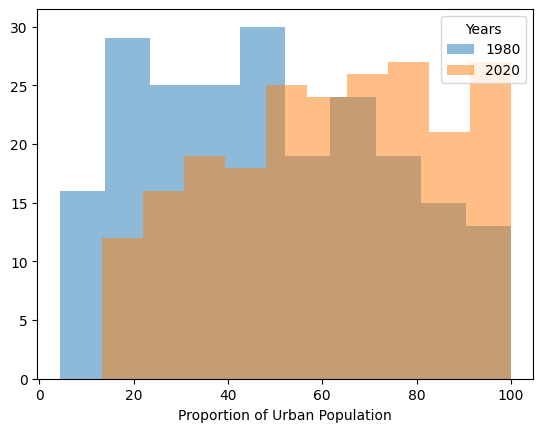

In [33]:
# Write your own code here
data_urban = pd.read_csv("data/wdi_urban.csv")

list_years = pd.unique(data_urban["year"])
for year in list_years:
    df = data_urban.query("year == @year")
    plt.hist(x=df["prop_urbanpopulation"], alpha = 0.5)

plt.xlabel("Proportion of Urban Population")
plt.legend(labels = list_years, title="Years")
plt.show()



